In [1]:
from utils.dataset import CocoDataset
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
CDS = CocoDataset(image_folder=r'D:\Work\work\FasterRCNN-Torchvision-FineTuning\dataset\AquariumDataset\train\images',
                  annotations_file=r'D:\Work\work\FasterRCNN-Torchvision-FineTuning\dataset\AquariumDataset\train\_annotations.coco_neg.json',
                  height=640,width=640)

In [3]:
CDS.get_classnames()

['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']

In [4]:
CDS.get_total_classes_count()

7

In [5]:
# For negative images
image_resized, target = CDS[449]
target

{'boxes': tensor([], size=(0, 4)),
 'labels': tensor([], size=(0, 1), dtype=torch.int64),
 'area': tensor([]),
 'iscrowd': tensor([], dtype=torch.int64),
 'image_id': tensor([449])}

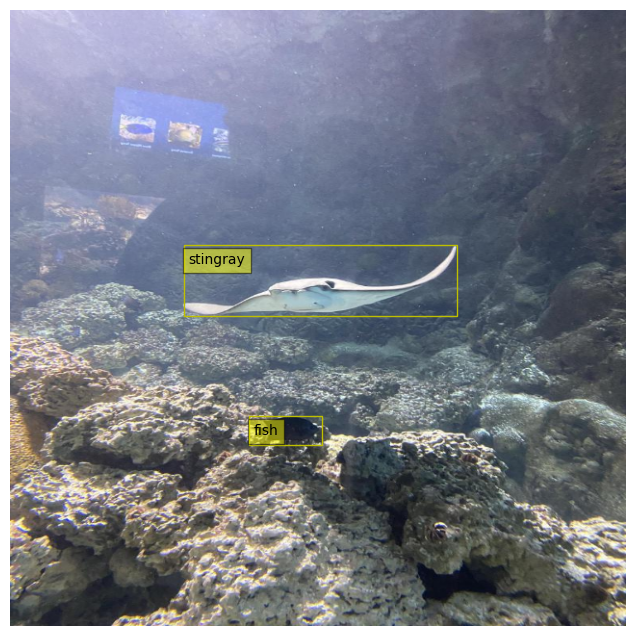

In [7]:
image_resized, target = CDS[190]
if target['boxes'].numel() == 0:
    print('Its a negative image ..')
else:
    clss = CDS.get_classnames()
    classnames = [clss[i-1] for i in target['labels'].tolist()]

    fig, ax = plt.subplots(figsize=(8, 8))
    simg = np.transpose(image_resized.numpy(), (1, 2, 0))
    ax.imshow(simg)
    plt.close()
    fig, ax = CDS.display_bbox(bboxes=target['boxes'],fig=fig, ax=ax, 
                            in_format='xyxy', line_width=1, classes=classnames)
    ax.axis('off')
    display(fig)